# Feature extraction from the datasets

#### - Danial Hawari [ lida1018 ] [ 67252 ]
#### - Kai Li Ong [ onka1012 ] [ 67254 ]

### Import Library

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from csv import writer
from pprint import pprint
from csv import DictWriter
from matplotlib import pyplot as plt

### Extract features from 1 image

In [2]:
# Load an image from folder
main_project_path = r"C:\Users\danny\OneDrive - bwedu\EU4M MASTER SUBJECTS\SEMESTER 2\Kuenstliche Intelligenz\AI\ImageClassificationMethods"
#main_project_path = r"C:\Users\KylieOng\Documents\GitHub\ImageClassificationMethods"
image_path = os.path.join(main_project_path,"dataset", "Kamm", "image_94.png")

image = cv2.imread(image_path)
image_copy = image.copy()
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Threshold for checking image brightness

Light Image


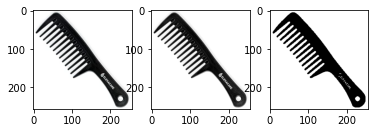

In [3]:
dark_bright_threshold = 200
mean_of_gray_image = np.mean(image_gray)

#Select threshold for further operation based on image brightness
if mean_of_gray_image < dark_bright_threshold:
    # Image is dark
    contour_recognition_threshold = 120
    print("Dark Image")
else:
    #Image is bright
    contour_recognition_threshold = 200
    print("Light Image")


#With determine the dark or bright image, we could set the contour recognition threshold. Then we could find image_thresh for later use in finding contour.
_, image_thresh = cv2.threshold(image_gray, contour_recognition_threshold, 255, cv2.THRESH_BINARY)
plt.subplot(1,3,1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(image_gray, "gray")
plt.subplot(1, 3, 3)
plt.imshow(image_thresh, "gray")

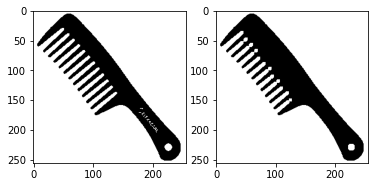

In [4]:
plt.subplot(1,2,1)
plt.imshow(image_thresh, "gray")
kernel = np.ones((3, 3), np.uint8)
image_thresh = cv2.morphologyEx(image_thresh, cv2.MORPH_OPEN, kernel, iterations=2)
plt.subplot(1, 2, 2)
plt.imshow(image_thresh, "gray")

#### Find contours of the object to get greatest contour by area

Area 15135.5


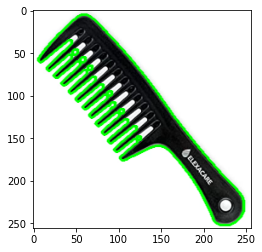

In [5]:
contours, _ = cv2.findContours(image_thresh, cv2.RETR_TREE, cv2.cv2.CHAIN_APPROX_NONE)

# get greatest contour by area
im_boundary = (image_thresh.shape[0] - 1) * (image_thresh.shape[1] - 1)
areas = [cv2.contourArea(ar) for ar in contours]
cnt = [x for x in areas if x != im_boundary]
cnt = contours[areas.index(max(cnt))]
contour_area = cv2.contourArea(cnt)
print("Area", contour_area)

to_show_contour = image_copy.copy()
cv2.drawContours(to_show_contour, cnt, -1, (0, 255, 0), 2, cv2.LINE_AA)
plt.imshow(to_show_contour)

#### Find rectangle of the object

Rectangle 304.4660949707031 84.83128356933594
Ratio width-length 3.5890780165061518


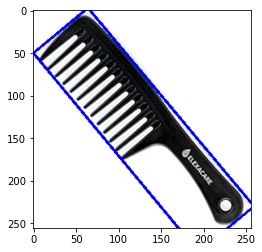

In [6]:
rect = cv2.minAreaRect(cnt)
rect_area = rect[1][0] * rect[1][1]
box = cv2.boxPoints(rect)
box = np.int0(box)
print("Rectangle", rect[1][0], rect[1][1])

to_show_box = image_copy.copy()
cv2.drawContours(to_show_box, [box], 0, (0, 0, 255), 2)
plt.imshow(to_show_box)

# ratio width & length
a = rect[1][0] / rect[1][1]
print("Ratio width-length", a)

#### Convex Hull : find the exterior or shape of the object

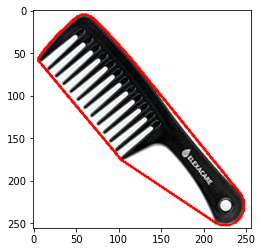

In [7]:
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
to_show_hull = image_copy.copy()
cv2.drawContours(to_show_hull, [hull], 0, (255, 0, 0), 2)
plt.imshow(to_show_hull)

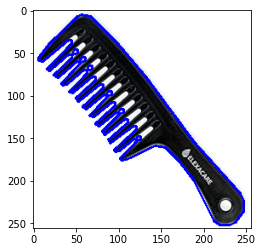

In [8]:
contour_perimeters = cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, 0.001 * contour_perimeters, True)
approximation_area = cv2.contourArea(approx)
to_show_approx = image_copy.copy()
cv2.drawContours(to_show_approx, [approx], -1, (0, 0, 255), 2)
plt.imshow(to_show_approx)

#### Detect good corners

good corners 47


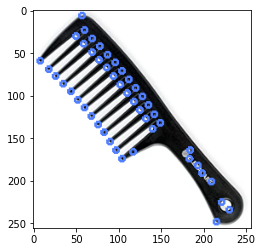

In [9]:
# Detect corners from grayscale image
corners = cv2.goodFeaturesToTrack(np.float32(image_gray), 100, 0.01, 10)
corners = np.int0(corners)
to_show_corners = image_copy.copy()
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(to_show_corners, (x, y), 3, (80, 127, 255), 2)
plt.imshow(to_show_corners)
print("good corners", len(corners))

#### Harris Corners

harris corners 257


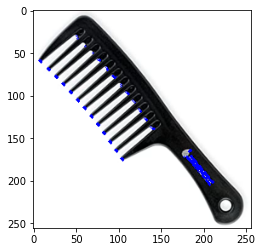

In [10]:
h_corners = cv2.cornerHarris(np.float32(image_gray), 2, 3, 0.04)
h_corners = np.int0(h_corners)
to_show_corners_harris = image_copy.copy()
h_threshold = 0.05
for i in range(h_corners.shape[0]):
    for j in range(h_corners.shape[1]):
        if h_corners[i, j] > h_corners.max() * h_threshold:
            cv2.circle(to_show_corners_harris, (j, i), 1, (0, 0, 255), 1)
plt.imshow(to_show_corners_harris)
amount_h_corners = len(h_corners[h_corners > h_corners.max() * h_threshold])
print("harris corners", amount_h_corners)

### Extract features from all dataset

In [11]:
# Load images
main_project_path = r"C:\Users\danny\OneDrive - bwedu\EU4M MASTER SUBJECTS\SEMESTER 2\Kuenstliche Intelligenz\AI\ImageClassificationMethods"
#main_project_path = r"C:\Users\KylieOng\Documents\GitHub\ImageClassificationMethods"
image_folder = os.path.join(main_project_path,"dataset")
feature_path = os.path.join(main_project_path,"feature","feature.csv")

# join image_folder with 
buerste_path = os.path.join(image_folder,"Buerste")
kamm_path = os.path.join(image_folder,"Kamm")

# check the number of images in the paths
buerste_list = os.listdir(buerste_path)
kamm_list = os.listdir(kamm_path)
number_files_buerste = len(buerste_list)
number_files_kamm = len(kamm_list)
print("number_files_buerste: ", number_files_buerste)
print("number_files_kamm: ", number_files_kamm)

images_list = []
valid_images = [".jpg",".png"]

for f in os.listdir(buerste_path):
    images_list.append(os.path.join(buerste_path,f))
    
for f in os.listdir(kamm_path):
    images_list.append(os.path.join(kamm_path,f))

number_files_buerste:  2800
number_files_kamm:  2800


In [ ]:
for image_path in images_list:
    #print(image_path)
    image = cv2.imread(image_path)
    image_copy = image.copy()
    image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    dark_bright_threshold = 200
    mean_of_gray_image = np.mean(image_gray)

    #Select threshold for further operation based on image brightness
    if mean_of_gray_image < dark_bright_threshold:
        # Image i dark
        contour_recognition_threshold = 120
        #print("Dark Image")
    else:
        #Image is bright
        contour_recognition_threshold = 200
        #print("Light Image")

    _, image_thresh = cv2.threshold(image_gray, contour_recognition_threshold, 255, cv2.THRESH_BINARY)

    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.subplot(1, 3, 2)
    plt.imshow(image_gray, "gray")
    plt.subplot(1, 3, 3)
    plt.imshow(image_thresh, "gray")

    plt.subplot(1,2,1)
    plt.imshow(image_thresh, "gray")
    kernel = np.ones((3, 3), np.uint8)
    image_thresh = cv2.morphologyEx(image_thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    plt.subplot(1, 2, 2)
    plt.imshow(image_thresh, "gray")

    contours, _ = cv2.findContours(image_thresh, cv2.RETR_TREE, cv2.cv2.CHAIN_APPROX_NONE)

    # get greatest contour by area
    im_boundary = (image_thresh.shape[0] - 1) * (image_thresh.shape[1] - 1)
    areas = [cv2.contourArea(ar) for ar in contours]
    cnt = [x for x in areas if x != im_boundary]
    cnt = contours[areas.index(max(cnt))]
    contour_area = cv2.contourArea(cnt)
    #print("Area", contour_area)

    to_show_contour = image_copy.copy()
    cv2.drawContours(to_show_contour, cnt, -1, (0, 255, 0), 2, cv2.LINE_AA)
    plt.imshow(to_show_contour)

    rect = cv2.minAreaRect(cnt)
    rect_area = rect[1][0] * rect[1][1]
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    #print("Rectangle", rect[1][0], rect[1][1])
    to_show_box = image_copy.copy()
    cv2.drawContours(to_show_box, [box], 0, (0, 0, 255), 2)
    plt.imshow(to_show_box)

    a = rect[1][0] / rect[1][1]
    #print(a)

    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    to_show_hull = image_copy.copy()
    cv2.drawContours(to_show_hull, [hull], 0, (255, 0, 0), 2)
    plt.imshow(to_show_hull)

    contour_perimeters = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.001 * contour_perimeters, True)
    approximation_area = cv2.contourArea(approx)
    to_show_approx = image_copy.copy()
    cv2.drawContours(to_show_approx, [approx], -1, (0, 0, 255), 3)
    plt.imshow(to_show_approx)

    # Detect corners from grayscale image
    corners = cv2.goodFeaturesToTrack(np.float32(image_gray), 100, 0.01, 10)
    corners = np.int0(corners)
    to_show_corners = image_copy.copy()
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(to_show_corners, (x, y), 3, (80, 127, 255), 2)
    plt.imshow(to_show_corners)
    #print("good corners", len(corners))
    
    h_corners = cv2.cornerHarris(np.float32(image_gray), 2, 3, 0.04)
    h_corners = np.int0(h_corners)
    to_show_corners_harris = image_copy.copy()
    h_threshold = 0.05
    for i in range(h_corners.shape[0]):
        for j in range(h_corners.shape[1]):
            if h_corners[i, j] > h_corners.max() * h_threshold:
                cv2.circle(to_show_corners_harris, (j, i), 1, (0, 0, 255), 1)
    plt.imshow(to_show_corners_harris)
    amount_h_corners = len(h_corners[h_corners > h_corners.max() * h_threshold])
    #print("harris corners", amount_h_corners)

    buerste_string = "Buerste"
    kamm_string = "Kamm"
    if buerste_string in image_path:
        object_type = 0
    elif kamm_string in image_path:
        object_type = 1
    
    
    index = image_path.lstrip(image_folder)
    index = index.lstrip('image_')
    index = index.rstrip('.png')
    # Store features as dictionary
    data = {
        "contour_points": len(cnt),
        "amount_contours": len(contours),
        "rect_area": rect_area,
        "hull_area": hull_area,
        "approximation_area": approximation_area,
        "contour_perimeters": contour_perimeters,
        "corners": len(corners),
        "harris_corners": amount_h_corners,
        "ratio_wide_length": rect[1][0] / rect[1][1],
        "contour_length_area_ratio": contour_perimeters / contour_area,
        "contour_length_rect_area_ratio": contour_perimeters / rect_area,
        "contour_length_hull_area_ratio": contour_perimeters / hull_area,
        "contour_rect_length_ratio": contour_perimeters / (2 * (rect[1][0] + rect[1][1])),
        "contour_hull_length_ratio": contour_perimeters / cv2.arcLength(hull, True),
        "extent": contour_area / rect_area,
        "solidity": contour_area / hull_area,
        "hull_rectangle_ratio": hull_area / rect_area,
        "Type": object_type
    }
    print(data)
    field_names = ["contour_points", "amount_contours", "rect_area", "hull_area", "approximation_area",
        "contour_perimeters", "corners", "harris_corners","ratio_wide_length", "contour_length_area_ratio",
        "contour_length_rect_area_ratio", "contour_length_hull_area_ratio",
        "contour_rect_length_ratio", "contour_hull_length_ratio", "extent", "solidity", "hull_rectangle_ratio", "Type"]

    # Save feature into a CSV file
    with open(feature_path, 'a',newline='\n',encoding='utf-8')as f_object:
        # Pass the file object and a list
        # of column names to DictWriter()
        # You will get a object of DictWriter
        dictwriter_object = DictWriter(f_object, fieldnames=field_names)

        # Pass the dictionary as an argument to the Writerow()
        dictwriter_object.writerow(data)

        # Close the file object
        f_object.close()

{'contour_points': 676, 'amount_contours': 3, 'rect_area': 20729.54524463974, 'hull_area': 14977.0, 'approximation_area': 10152.5, 'contour_perimeters': 789.4945094585419, 'corners': 53, 'harris_corners': 901, 'ratio_wide_length': 3.3993290006917114, 'contour_length_area_ratio': 0.07731046900299078, 'contour_length_rect_area_ratio': 0.038085471733283194, 'contour_length_hull_area_ratio': 0.05271379511641463, 'contour_rect_length_ratio': 1.1490379934398853, 'contour_hull_length_ratio': 1.3183012217982621, 'extent': 0.492630199046003, 'solidity': 0.6818454964278561, 'hull_rectangle_ratio': 0.7224953477391292, 'Type': 0}
{'contour_points': 1725, 'amount_contours': 3, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 48154.5, 'contour_perimeters': 1847.192993760109, 'corners': 92, 'harris_corners': 1582, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03850845854592303, 'contour_length_rect_area_ratio': 0.02840742781637999, 'contour_length_hull_area_ratio': 0.02840

{'contour_points': 842, 'amount_contours': 11, 'rect_area': 28016.367999855196, 'hull_area': 20324.0, 'approximation_area': 15372.0, 'contour_perimeters': 953.0092282295227, 'corners': 63, 'harris_corners': 605, 'ratio_wide_length': 0.37351722401939136, 'contour_length_area_ratio': 0.0617553932237897, 'contour_length_rect_area_ratio': 0.03401615899086021, 'contour_length_hull_area_ratio': 0.046890829966026504, 'contour_rect_length_ratio': 1.2667251710141707, 'contour_hull_length_ratio': 1.5323115983763254, 'extent': 0.5508208630069309, 'solidity': 0.7592993505215508, 'hull_rectangle_ratio': 0.7254330754116681, 'Type': 0}
{'contour_points': 1556, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 53170.0, 'contour_perimeters': 1622.2741661071777, 'corners': 54, 'harris_corners': 517, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.030593361233092156, 'contour_length_rect_area_ratio': 0.024948468529137683, 'contour_length_hull_area_ratio': 0.

{'contour_points': 920, 'amount_contours': 4, 'rect_area': 55844.9855346689, 'hull_area': 35559.0, 'approximation_area': 23985.0, 'contour_perimeters': 989.5878744125366, 'corners': 78, 'harris_corners': 355, 'ratio_wide_length': 0.8588235125162177, 'contour_length_area_ratio': 0.041296493528044764, 'contour_length_rect_area_ratio': 0.017720263779067408, 'contour_length_hull_area_ratio': 0.02782946298862557, 'contour_rect_length_ratio': 1.0438692002510297, 'contour_hull_length_ratio': 1.18649911207817, 'extent': 0.4290985084976632, 'solidity': 0.673894091509885, 'hull_rectangle_ratio': 0.6367447257717483, 'Type': 0}
{'contour_points': 1386, 'amount_contours': 3, 'rect_area': 65025.0, 'hull_area': 61395.0, 'approximation_area': 44348.5, 'contour_perimeters': 1468.8427076339722, 'corners': 62, 'harris_corners': 157, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.033170947079649786, 'contour_length_rect_area_ratio': 0.02258889208202956, 'contour_length_hull_area_ratio': 0.023924

{'contour_points': 1699, 'amount_contours': 2, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 48213.0, 'contour_perimeters': 1785.570629477501, 'corners': 46, 'harris_corners': 199, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03705464341328147, 'contour_length_rect_area_ratio': 0.02745975593198771, 'contour_length_hull_area_ratio': 0.02745975593198771, 'contour_rect_length_ratio': 1.7505594406642166, 'contour_hull_length_ratio': 1.7505594406642166, 'extent': 0.7410611303344867, 'solidity': 0.7410611303344867, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 678, 'amount_contours': 6, 'rect_area': 28232.238580300473, 'hull_area': 22084.0, 'approximation_area': 17653.0, 'contour_perimeters': 747.5878744125366, 'corners': 80, 'harris_corners': 902, 'ratio_wide_length': 2.041725743327838, 'contour_length_area_ratio': 0.042327475620684896, 'contour_length_rect_area_ratio': 0.026479936129973725, 'contour_length_hull_area_ratio': 0.03385201387486581, 

{'contour_points': 1763, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 47500.5, 'contour_perimeters': 1866.967598080635, 'corners': 73, 'harris_corners': 238, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03950459903470487, 'contour_length_rect_area_ratio': 0.02871153553372757, 'contour_length_hull_area_ratio': 0.02871153553372757, 'contour_rect_length_ratio': 1.8303603902751324, 'contour_hull_length_ratio': 1.8303603902751324, 'extent': 0.7267896962706651, 'solidity': 0.7267896962706651, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 1014, 'amount_contours': 3, 'rect_area': 65025.0, 'hull_area': 64843.5, 'approximation_area': 64733.5, 'contour_perimeters': 1016.4852812290192, 'corners': 58, 'harris_corners': 555, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.01568601711720347, 'contour_length_rect_area_ratio': 0.015632222702483954, 'contour_length_hull_area_ratio': 0.015675978027543534, 'contour_rect_length_ra

{'contour_points': 1666, 'amount_contours': 5, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 49975.0, 'contour_perimeters': 1768.7249574661255, 'corners': 70, 'harris_corners': 523, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03544610027187169, 'contour_length_rect_area_ratio': 0.027200691387406776, 'contour_length_hull_area_ratio': 0.027200691387406776, 'contour_rect_length_ratio': 1.7340440759471818, 'contour_hull_length_ratio': 1.7340440759471818, 'extent': 0.7673817762399078, 'solidity': 0.7673817762399078, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 391, 'amount_contours': 2, 'rect_area': 12331.44828463043, 'hull_area': 10309.0, 'approximation_area': 9896.0, 'contour_perimeters': 429.52185904979706, 'corners': 38, 'harris_corners': 92, 'ratio_wide_length': 0.6022996126202657, 'contour_length_area_ratio': 0.043401390294528074, 'contour_length_rect_area_ratio': 0.03483142037623764, 'contour_length_hull_area_ratio': 0.041664745275952764

{'contour_points': 917, 'amount_contours': 9, 'rect_area': 25815.88612538972, 'hull_area': 18656.5, 'approximation_area': 14949.0, 'contour_perimeters': 1000.256921172142, 'corners': 55, 'harris_corners': 341, 'ratio_wide_length': 0.7074316978388545, 'contour_length_area_ratio': 0.06681966138963506, 'contour_length_rect_area_ratio': 0.038745790724123055, 'contour_length_hull_area_ratio': 0.05361439290178447, 'contour_rect_length_ratio': 1.5333347177410281, 'contour_hull_length_ratio': 1.9037712713021364, 'extent': 0.5798561369263872, 'solidity': 0.8023745075442875, 'hull_rectangle_ratio': 0.7226751740917962, 'Type': 0}
{'contour_points': 1526, 'amount_contours': 1, 'rect_area': 65024.98443603609, 'hull_area': 64966.5, 'approximation_area': 57313.5, 'contour_perimeters': 1643.6366448402405, 'corners': 32, 'harris_corners': 84, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.028604386363624727, 'contour_length_rect_area_ratio': 0.025277001741646803, 'contour_length_hull_area_rat

{'contour_points': 573, 'amount_contours': 2, 'rect_area': 17349.55193781387, 'hull_area': 13366.5, 'approximation_area': 11019.0, 'contour_perimeters': 619.8061298131943, 'corners': 62, 'harris_corners': 1049, 'ratio_wide_length': 3.2647450981541337, 'contour_length_area_ratio': 0.05625651280355746, 'contour_length_rect_area_ratio': 0.035724618827896536, 'contour_length_hull_area_ratio': 0.04637011407722248, 'contour_rect_length_ratio': 0.9968120979937309, 'contour_hull_length_ratio': 1.1448368648805836, 'extent': 0.6350308088353006, 'solidity': 0.8242621479070812, 'hull_rectangle_ratio': 0.7704233543269386, 'Type': 0}
{'contour_points': 1065, 'amount_contours': 7, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 64922.0, 'contour_perimeters': 1077.012192606926, 'corners': 76, 'harris_corners': 530, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.01659047548976664, 'contour_length_rect_area_ratio': 0.01656304794474319, 'contour_length_hull_area_ratio': 0.0165

{'contour_points': 800, 'amount_contours': 4, 'rect_area': 33184.362448730506, 'hull_area': 24250.0, 'approximation_area': 20603.5, 'contour_perimeters': 912.6660823822021, 'corners': 80, 'harris_corners': 560, 'ratio_wide_length': 2.440823252194792, 'contour_length_area_ratio': 0.04422474596027534, 'contour_length_rect_area_ratio': 0.027502896395621937, 'contour_length_hull_area_ratio': 0.0376357147374104, 'contour_rect_length_ratio': 1.1374203073444065, 'contour_hull_length_ratio': 1.378420730044239, 'extent': 0.6218893019832443, 'solidity': 0.8510103092783505, 'hull_rectangle_ratio': 0.7307658852107223, 'Type': 0}
{'contour_points': 1571, 'amount_contours': 2, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 48522.5, 'contour_perimeters': 1667.5117543935776, 'corners': 71, 'harris_corners': 503, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03441681209468587, 'contour_length_rect_area_ratio': 0.025644163850727836, 'contour_length_hull_area_ratio': 0.02564

{'contour_points': 1694, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 48318.5, 'contour_perimeters': 1795.068103313446, 'corners': 68, 'harris_corners': 435, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.037198858241740844, 'contour_length_rect_area_ratio': 0.02760581473761547, 'contour_length_hull_area_ratio': 0.02760581473761547, 'contour_rect_length_ratio': 1.7598706895229863, 'contour_hull_length_ratio': 1.7598706895229863, 'extent': 0.7421145713187236, 'solidity': 0.7421145713187236, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 670, 'amount_contours': 6, 'rect_area': 24510.081498710555, 'hull_area': 17697.0, 'approximation_area': 15390.0, 'contour_perimeters': 759.4701242446899, 'corners': 79, 'harris_corners': 689, 'ratio_wide_length': 2.475040156290406, 'contour_length_area_ratio': 0.04930023526417981, 'contour_length_rect_area_ratio': 0.030986030147824875, 'contour_length_hull_area_ratio': 0.042915190385076, 'c

{'contour_points': 486, 'amount_contours': 15, 'rect_area': 14918.455723071238, 'hull_area': 11323.5, 'approximation_area': 9843.0, 'contour_perimeters': 549.7888848781586, 'corners': 42, 'harris_corners': 188, 'ratio_wide_length': 1.5531549448703392, 'contour_length_area_ratio': 0.05582179763205996, 'contour_length_rect_area_ratio': 0.03685293538981489, 'contour_length_hull_area_ratio': 0.04855291075004712, 'contour_rect_length_ratio': 1.0985864671238734, 'contour_hull_length_ratio': 1.3527229800444973, 'extent': 0.6601889755096181, 'solidity': 0.8697840773612399, 'hull_rectangle_ratio': 0.759026283296087, 'Type': 0}
{'contour_points': 771, 'amount_contours': 2, 'rect_area': 33914.98815918062, 'hull_area': 32819.5, 'approximation_area': 31463.0, 'contour_perimeters': 789.6396092176437, 'corners': 58, 'harris_corners': 214, 'ratio_wide_length': 1.9172934435607092, 'contour_length_area_ratio': 0.025100195782439126, 'contour_length_rect_area_ratio': 0.023282909771675454, 'contour_length_

{'contour_points': 422, 'amount_contours': 26, 'rect_area': 8140.0, 'hull_area': 7279.5, 'approximation_area': 6784.5, 'contour_perimeters': 453.4802289009094, 'corners': 57, 'harris_corners': 1340, 'ratio_wide_length': 0.6727272727272727, 'contour_length_area_ratio': 0.06679632182956391, 'contour_length_rect_area_ratio': 0.055710101830578555, 'contour_length_hull_area_ratio': 0.0622955187720186, 'contour_rect_length_ratio': 1.232283230708993, 'contour_hull_length_ratio': 1.4254598479615541, 'extent': 0.8340294840294841, 'solidity': 0.9326189985575932, 'hull_rectangle_ratio': 0.8942874692874693, 'Type': 0}
{'contour_points': 1020, 'amount_contours': 2, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 65014.0, 'contour_perimeters': 1022.4852812290192, 'corners': 42, 'harris_corners': 197, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.015727397308677022, 'contour_length_rect_area_ratio': 0.015724494905482802, 'contour_length_hull_area_ratio': 0.015724494905482

{'contour_points': 570, 'amount_contours': 2, 'rect_area': 19440.0, 'hull_area': 13045.0, 'approximation_area': 10188.5, 'contour_perimeters': 619.7056245803833, 'corners': 59, 'harris_corners': 788, 'ratio_wide_length': 0.3375, 'contour_length_area_ratio': 0.06077332789843908, 'contour_length_rect_area_ratio': 0.031877861346727536, 'contour_length_hull_area_ratio': 0.04750522227523061, 'contour_rect_length_ratio': 0.9652735585364226, 'contour_hull_length_ratio': 1.1552204867679996, 'extent': 0.524537037037037, 'solidity': 0.7816788041395171, 'hull_rectangle_ratio': 0.6710390946502057, 'Type': 0}
{'contour_points': 2020, 'amount_contours': 30, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 41729.0, 'contour_perimeters': 2185.6854152679443, 'corners': 100, 'harris_corners': 665, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.05258981774423003, 'contour_length_rect_area_ratio': 0.03361300138820368, 'contour_length_hull_area_ratio': 0.03361300138820368, 'conto

{'contour_points': 638, 'amount_contours': 11, 'rect_area': 24408.380455970764, 'hull_area': 16994.0, 'approximation_area': 14881.5, 'contour_perimeters': 724.9848430156708, 'corners': 73, 'harris_corners': 289, 'ratio_wide_length': 2.186101426270832, 'contour_length_area_ratio': 0.04869264846636247, 'contour_length_rect_area_ratio': 0.029702291978094982, 'contour_length_hull_area_ratio': 0.04266122413885317, 'contour_rect_length_ratio': 1.0767255188094376, 'contour_hull_length_ratio': 1.313035075340753, 'extent': 0.6099954082106198, 'solidity': 0.8761327527362599, 'hull_rectangle_ratio': 0.6962362796112078, 'Type': 0}
{'contour_points': 564, 'amount_contours': 3, 'rect_area': 18468.0, 'hull_area': 14484.0, 'approximation_area': 11605.0, 'contour_perimeters': 603.7644996643066, 'corners': 55, 'harris_corners': 44, 'ratio_wide_length': 0.35526315789473684, 'contour_length_area_ratio': 0.05202623866129312, 'contour_length_rect_area_ratio': 0.03269246803467114, 'contour_length_hull_area_r

{'contour_points': 1375, 'amount_contours': 16, 'rect_area': 36592.29385100305, 'hull_area': 26431.5, 'approximation_area': 21736.0, 'contour_perimeters': 1493.0508583784103, 'corners': 100, 'harris_corners': 578, 'ratio_wide_length': 1.0386224708167648, 'contour_length_area_ratio': 0.06879309136214944, 'contour_length_rect_area_ratio': 0.040802330251769214, 'contour_length_hull_area_ratio': 0.05648755683099371, 'contour_rect_length_ratio': 1.950930681294961, 'contour_hull_length_ratio': 2.440484742465768, 'extent': 0.5931166843044214, 'solidity': 0.8211225242608251, 'hull_rectangle_ratio': 0.7223242168863232, 'Type': 0}
{'contour_points': 638, 'amount_contours': 5, 'rect_area': 21904.164678828092, 'hull_area': 16463.0, 'approximation_area': 13048.5, 'contour_perimeters': 757.2934989929199, 'corners': 74, 'harris_corners': 522, 'ratio_wide_length': 0.32170835226538436, 'contour_length_area_ratio': 0.05803460027534063, 'contour_length_rect_area_ratio': 0.03457303714142074, 'contour_leng

{'contour_points': 1799, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 54338.5, 'contour_perimeters': 1862.3746713399887, 'corners': 51, 'harris_corners': 156, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.034323476466609326, 'contour_length_rect_area_ratio': 0.028640902288965608, 'contour_length_hull_area_ratio': 0.028640902288965608, 'contour_rect_length_ratio': 1.8258575209215575, 'contour_hull_length_ratio': 1.8258575209215575, 'extent': 0.8344405997693195, 'solidity': 0.8344405997693195, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 693, 'amount_contours': 2, 'rect_area': 24779.03374695126, 'hull_area': 18811.5, 'approximation_area': 14903.5, 'contour_perimeters': 825.9625457525253, 'corners': 18, 'harris_corners': 215, 'ratio_wide_length': 0.30925270752128897, 'contour_length_area_ratio': 0.05535756481032977, 'contour_length_rect_area_ratio': 0.03333312162965795, 'contour_length_hull_area_ratio': 0.04390731976464, 

{'contour_points': 1578, 'amount_contours': 3, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 48305.0, 'contour_perimeters': 1675.7543950080872, 'corners': 66, 'harris_corners': 525, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03472922148321494, 'contour_length_rect_area_ratio': 0.02577092495206593, 'contour_length_hull_area_ratio': 0.02577092495206593, 'contour_rect_length_ratio': 1.6428964656942031, 'contour_hull_length_ratio': 1.6428964656942031, 'extent': 0.7420530565167244, 'solidity': 0.7420530565167244, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 1847, 'amount_contours': 4, 'rect_area': 65025.0, 'hull_area': 63251.5, 'approximation_area': 46476.5, 'contour_perimeters': 1962.5655771493912, 'corners': 78, 'harris_corners': 382, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.04235189367924538, 'contour_length_rect_area_ratio': 0.03018170822221286, 'contour_length_hull_area_ratio': 0.031027968935904936, 'contour_rect_length_ra

{'contour_points': 611, 'amount_contours': 2, 'rect_area': 26958.462678216863, 'hull_area': 20656.0, 'approximation_area': 16101.0, 'contour_perimeters': 724.9087229967117, 'corners': 74, 'harris_corners': 1229, 'ratio_wide_length': 0.3575757675113695, 'contour_length_area_ratio': 0.04499045604324045, 'contour_length_rect_area_ratio': 0.026889839070180242, 'contour_length_hull_area_ratio': 0.03509434174073934, 'contour_rect_length_ratio': 0.9723569690208341, 'contour_hull_length_ratio': 1.1188452825092543, 'extent': 0.597678739782863, 'solidity': 0.780039697908598, 'hull_rectangle_ratio': 0.7662157982283828, 'Type': 0}
{'contour_points': 1478, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65024.5, 'approximation_area': 57927.0, 'contour_perimeters': 1533.5046141147614, 'corners': 49, 'harris_corners': 185, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.026419692200998577, 'contour_length_rect_area_ratio': 0.023583308175544195, 'contour_length_hull_area_ratio': 0.02

{'contour_points': 1578, 'amount_contours': 3, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 48294.0, 'contour_perimeters': 1675.7543950080872, 'corners': 66, 'harris_corners': 525, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03472922148321494, 'contour_length_rect_area_ratio': 0.02577092495206593, 'contour_length_hull_area_ratio': 0.02577092495206593, 'contour_rect_length_ratio': 1.6428964656942031, 'contour_hull_length_ratio': 1.6428964656942031, 'extent': 0.7420530565167244, 'solidity': 0.7420530565167244, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 1847, 'amount_contours': 4, 'rect_area': 65025.0, 'hull_area': 63251.5, 'approximation_area': 46513.5, 'contour_perimeters': 1962.5655771493912, 'corners': 78, 'harris_corners': 380, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.04235189367924538, 'contour_length_rect_area_ratio': 0.03018170822221286, 'contour_length_hull_area_ratio': 0.031027968935904936, 'contour_rect_length_ra

{'contour_points': 715, 'amount_contours': 4, 'rect_area': 20710.67111844197, 'hull_area': 14950.5, 'approximation_area': 12547.5, 'contour_perimeters': 823.1097334623337, 'corners': 64, 'harris_corners': 615, 'ratio_wide_length': 0.2519127684357606, 'contour_length_area_ratio': 0.06544303187933481, 'contour_length_rect_area_ratio': 0.03974326707015253, 'contour_length_hull_area_ratio': 0.05505566592838592, 'contour_rect_length_ratio': 1.1465201109694203, 'contour_hull_length_ratio': 1.3238094811772756, 'extent': 0.6072956268809789, 'solidity': 0.8412762114979432, 'hull_rectangle_ratio': 0.7218742412787974, 'Type': 0}
{'contour_points': 1007, 'amount_contours': 2, 'rect_area': 65024.98443603609, 'hull_area': 64787.0, 'approximation_area': 64758.0, 'contour_perimeters': 1012.3847759962082, 'corners': 49, 'harris_corners': 178, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.01563444101085205, 'contour_length_rect_area_ratio': 0.015569165987145648, 'contour_length_hull_area_rati

{'contour_points': 912, 'amount_contours': 2, 'rect_area': 51000.0, 'hull_area': 38055.0, 'approximation_area': 28214.5, 'contour_perimeters': 970.8183224201202, 'corners': 75, 'harris_corners': 588, 'ratio_wide_length': 0.7843137254901961, 'contour_length_area_ratio': 0.03445428265678107, 'contour_length_rect_area_ratio': 0.019035653380786673, 'contour_length_hull_area_ratio': 0.025510926880045203, 'contour_rect_length_ratio': 1.0668333213407915, 'contour_hull_length_ratio': 1.1779684430346073, 'extent': 0.5524901960784314, 'solidity': 0.7404283274208383, 'hull_rectangle_ratio': 0.7461764705882353, 'Type': 0}
{'contour_points': 589, 'amount_contours': 2, 'rect_area': 22745.30409082258, 'hull_area': 15053.5, 'approximation_area': 10944.0, 'contour_perimeters': 671.4284940958023, 'corners': 47, 'harris_corners': 109, 'ratio_wide_length': 0.7672425665368003, 'contour_length_area_ratio': 0.06132607152539638, 'contour_length_rect_area_ratio': 0.029519433612088506, 'contour_length_hull_area

{'contour_points': 638, 'amount_contours': 2, 'rect_area': 24787.75326438714, 'hull_area': 18534.5, 'approximation_area': 15866.5, 'contour_perimeters': 746.5239470005035, 'corners': 85, 'harris_corners': 448, 'ratio_wide_length': 0.3720738904945203, 'contour_length_area_ratio': 0.04699552703811794, 'contour_length_rect_area_ratio': 0.03011664425726891, 'contour_length_hull_area_ratio': 0.04027753362650752, 'contour_rect_length_ratio': 1.0539797410363012, 'contour_hull_length_ratio': 1.2252851269836003, 'extent': 0.6408406534698798, 'solidity': 0.8570503655345437, 'hull_rectangle_ratio': 0.7477281140533514, 'Type': 0}
{'contour_points': 941, 'amount_contours': 2, 'rect_area': 37513.35596761666, 'hull_area': 26943.0, 'approximation_area': 19822.0, 'contour_perimeters': 1084.7320977449417, 'corners': 71, 'harris_corners': 136, 'ratio_wide_length': 1.6782999413656745, 'contour_length_area_ratio': 0.054570851351776715, 'contour_length_rect_area_ratio': 0.028915890614567643, 'contour_length

{'contour_points': 1019, 'amount_contours': 5, 'rect_area': 65025.0, 'hull_area': 65001.0, 'approximation_area': 64897.5, 'contour_perimeters': 1019.4142135381699, 'corners': 100, 'harris_corners': 173, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.015688726305846945, 'contour_length_rect_area_ratio': 0.015677265875250593, 'contour_length_hull_area_ratio': 0.015683054315136228, 'contour_rect_length_ratio': 0.9994256995472254, 'contour_hull_length_ratio': 1.0003962662295085, 'extent': 0.9992695117262591, 'solidity': 0.9996384671005062, 'hull_rectangle_ratio': 0.9996309111880046, 'Type': 0}
{'contour_points': 768, 'amount_contours': 6, 'rect_area': 33405.0, 'hull_area': 29920.5, 'approximation_area': 27567.0, 'contour_perimeters': 801.1370830535889, 'corners': 53, 'harris_corners': 109, 'ratio_wide_length': 0.5137254901960784, 'contour_length_area_ratio': 0.029084664478256993, 'contour_length_rect_area_ratio': 0.023982550009088128, 'contour_length_hull_area_ratio': 0.026775524

{'contour_points': 1605, 'amount_contours': 2, 'rect_area': 65024.98443603609, 'hull_area': 64525.5, 'approximation_area': 53542.0, 'contour_perimeters': 1717.2518688440323, 'corners': 56, 'harris_corners': 87, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03219475002285421, 'contour_length_rect_area_ratio': 0.026409108494801135, 'contour_length_hull_area_ratio': 0.02661353835063707, 'contour_rect_length_ratio': 1.6835804650580646, 'contour_hull_length_ratio': 1.7152278236299285, 'extent': 0.8202923916493838, 'solidity': 0.8266421802233226, 'hull_rectangle_ratio': 0.9923185766153098, 'Type': 0}
{'contour_points': 860, 'amount_contours': 8, 'rect_area': 29657.087534376886, 'hull_area': 20219.5, 'approximation_area': 16667.5, 'contour_perimeters': 937.8721451759338, 'corners': 63, 'harris_corners': 478, 'ratio_wide_length': 0.6847159386597544, 'contour_length_area_ratio': 0.05613983869124469, 'contour_length_rect_area_ratio': 0.031623878915581424, 'contour_length_hull_area_rat

{'contour_points': 1657, 'amount_contours': 1, 'rect_area': 65024.98443603609, 'hull_area': 64113.5, 'approximation_area': 49881.5, 'contour_perimeters': 1745.2274836301804, 'corners': 56, 'harris_corners': 91, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.035028199215835505, 'contour_length_rect_area_ratio': 0.026839337198872062, 'contour_length_hull_area_ratio': 0.027220904858261993, 'contour_rect_length_ratio': 1.7110075416602015, 'contour_hull_length_ratio': 1.7425152263485433, 'extent': 0.7662208677498491, 'solidity': 0.7771140243474464, 'hull_rectangle_ratio': 0.9859825504928387, 'Type': 0}
{'contour_points': 656, 'amount_contours': 11, 'rect_area': 17995.080064656562, 'hull_area': 13446.5, 'approximation_area': 11382.5, 'contour_perimeters': 751.269113779068, 'corners': 65, 'harris_corners': 293, 'ratio_wide_length': 0.27459278731776826, 'contour_length_area_ratio': 0.0658257350196327, 'contour_length_rect_area_ratio': 0.04174858411742254, 'contour_length_hull_area_ra

{'contour_points': 895, 'amount_contours': 21, 'rect_area': 30340.262413931545, 'hull_area': 27002.0, 'approximation_area': 18387.5, 'contour_perimeters': 959.2030984163284, 'corners': 100, 'harris_corners': 637, 'ratio_wide_length': 0.4178151859008319, 'contour_length_area_ratio': 0.0522114742082208, 'contour_length_rect_area_ratio': 0.03161485834663989, 'contour_length_hull_area_ratio': 0.03552340931843302, 'contour_rect_length_ratio': 1.2552880591974842, 'contour_hull_length_ratio': 1.3474134748203377, 'extent': 0.6055155274980164, 'solidity': 0.680375527738686, 'hull_rectangle_ratio': 0.8899725266582172, 'Type': 0}
{'contour_points': 1622, 'amount_contours': 2, 'rect_area': 65025.0, 'hull_area': 60708.0, 'approximation_area': 50965.0, 'contour_perimeters': 1696.558436870575, 'corners': 38, 'harris_corners': 261, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03332989738852255, 'contour_length_rect_area_ratio': 0.026090864081054592, 'contour_length_hull_area_ratio': 0.0279

{'contour_points': 999, 'amount_contours': 2, 'rect_area': 65025.0, 'hull_area': 64560.5, 'approximation_area': 64522.5, 'contour_perimeters': 1007.6984843015671, 'corners': 40, 'harris_corners': 164, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.015618510439503826, 'contour_length_rect_area_ratio': 0.015497093184184038, 'contour_length_hull_area_ratio': 0.015608591697734172, 'contour_rect_length_ratio': 0.9879396904917325, 'contour_hull_length_ratio': 1.0047649342607934, 'extent': 0.9922260668973472, 'solidity': 0.99936493676474, 'hull_rectangle_ratio': 0.9928565936178393, 'Type': 0}
{'contour_points': 1557, 'amount_contours': 3, 'rect_area': 65024.98443603609, 'hull_area': 64511.5, 'approximation_area': 53989.0, 'contour_perimeters': 1648.5411919355392, 'corners': 45, 'harris_corners': 206, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03056334884981116, 'contour_length_rect_area_ratio': 0.025352427320565984, 'contour_length_hull_area_ratio': 0.02555422199042867

{'contour_points': 1589, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 54710.5, 'contour_perimeters': 1702.9087229967117, 'corners': 35, 'harris_corners': 223, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.031178240394677842, 'contour_length_rect_area_ratio': 0.026188523229476537, 'contour_length_hull_area_ratio': 0.026188523229476537, 'contour_rect_length_ratio': 1.6695183558791291, 'contour_hull_length_ratio': 1.6695183558791291, 'extent': 0.8399615532487504, 'solidity': 0.8399615532487504, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 1386, 'amount_contours': 3, 'rect_area': 65025.0, 'hull_area': 61395.0, 'approximation_area': 44348.5, 'contour_perimeters': 1468.8427076339722, 'corners': 62, 'harris_corners': 158, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.033170947079649786, 'contour_length_rect_area_ratio': 0.02258889208202956, 'contour_length_hull_area_ratio': 0.023924467914878608, 'contour_rect_lengt

{'contour_points': 642, 'amount_contours': 2, 'rect_area': 32482.818475216627, 'hull_area': 23046.5, 'approximation_area': 18070.5, 'contour_perimeters': 743.8965303897858, 'corners': 62, 'harris_corners': 191, 'ratio_wide_length': 1.9504521697099029, 'contour_length_area_ratio': 0.0411766041398088, 'contour_length_rect_area_ratio': 0.022901231029485804, 'contour_length_hull_area_ratio': 0.03227806957194306, 'contour_rect_length_ratio': 0.9768654702047433, 'contour_hull_length_ratio': 1.1913753596856422, 'extent': 0.5561709496909509, 'solidity': 0.7838934328422971, 'hull_rectangle_ratio': 0.7094981618538969, 'Type': 0}
{'contour_points': 1308, 'amount_contours': 4, 'rect_area': 35955.0, 'hull_area': 34693.5, 'approximation_area': 27479.0, 'contour_perimeters': 1385.8721451759338, 'corners': 91, 'harris_corners': 210, 'ratio_wide_length': 0.5529411764705883, 'contour_length_area_ratio': 0.05039718335851972, 'contour_length_rect_area_ratio': 0.03854462926368889, 'contour_length_hull_area

{'contour_points': 640, 'amount_contours': 2, 'rect_area': 21178.651126362383, 'hull_area': 15945.5, 'approximation_area': 13175.0, 'contour_perimeters': 778.3473217487335, 'corners': 46, 'harris_corners': 417, 'ratio_wide_length': 0.21083490363015395, 'contour_length_area_ratio': 0.05901936015686484, 'contour_length_rect_area_ratio': 0.036751505896420206, 'contour_length_hull_area_ratio': 0.04881297681156022, 'contour_rect_length_ratio': 1.0140996082533051, 'contour_hull_length_ratio': 1.1421814108027384, 'extent': 0.6227025470750627, 'solidity': 0.8270671976419679, 'hull_rectangle_ratio': 0.7529044179849417, 'Type': 0}
{'contour_points': 1569, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 56187.0, 'contour_perimeters': 1615.8061298131943, 'corners': 39, 'harris_corners': 176, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.028733359944752675, 'contour_length_rect_area_ratio': 0.024848998536150625, 'contour_length_hull_area_ratio': 0.

{'contour_points': 379, 'amount_contours': 2, 'rect_area': 11484.0, 'hull_area': 9947.5, 'approximation_area': 9527.0, 'contour_perimeters': 405.92387998104095, 'corners': 34, 'harris_corners': 33, 'ratio_wide_length': 0.6590909090909091, 'contour_length_area_ratio': 0.042609970081461286, 'contour_length_rect_area_ratio': 0.03534690699939402, 'contour_length_hull_area_ratio': 0.04080662276763417, 'contour_rect_length_ratio': 0.926766849271783, 'contour_hull_length_ratio': 1.0684927730253708, 'extent': 0.8295454545454546, 'solidity': 0.9576778084945966, 'hull_rectangle_ratio': 0.8662051549982585, 'Type': 0}
{'contour_points': 446, 'amount_contours': 2, 'rect_area': 9980.03412687569, 'hull_area': 8361.0, 'approximation_area': 7009.0, 'contour_perimeters': 472.5096664428711, 'corners': 33, 'harris_corners': 211, 'ratio_wide_length': 3.4594062349499266, 'contour_length_area_ratio': 0.06741470487128992, 'contour_length_rect_area_ratio': 0.047345496061023305, 'contour_length_hull_area_ratio'

{'contour_points': 632, 'amount_contours': 2, 'rect_area': 28013.99701638706, 'hull_area': 18628.5, 'approximation_area': 15907.0, 'contour_perimeters': 744.6660823822021, 'corners': 82, 'harris_corners': 418, 'ratio_wide_length': 2.9420287656814623, 'contour_length_area_ratio': 0.0468608698245675, 'contour_length_rect_area_ratio': 0.026581929095894543, 'contour_length_hull_area_ratio': 0.039974559539533626, 'contour_rect_length_ratio': 0.9679383718820007, 'contour_hull_length_ratio': 1.163958493286486, 'extent': 0.5672521486564165, 'solidity': 0.8530477494162171, 'hull_rectangle_ratio': 0.6649711567079513, 'Type': 0}
{'contour_points': 1358, 'amount_contours': 26, 'rect_area': 30263.415566724725, 'hull_area': 24157.5, 'approximation_area': 16680.0, 'contour_perimeters': 1550.1950817108154, 'corners': 100, 'harris_corners': 995, 'ratio_wide_length': 0.3418245374900257, 'contour_length_area_ratio': 0.09256001204387482, 'contour_length_rect_area_ratio': 0.051223401347179336, 'contour_len

{'contour_points': 1571, 'amount_contours': 2, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 48548.0, 'contour_perimeters': 1667.5117543935776, 'corners': 71, 'harris_corners': 503, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03441681209468587, 'contour_length_rect_area_ratio': 0.025644163850727836, 'contour_length_hull_area_ratio': 0.025644163850727836, 'contour_rect_length_ratio': 1.6348154454838997, 'contour_hull_length_ratio': 1.6348154454838997, 'extent': 0.7451057285659362, 'solidity': 0.7451057285659362, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 555, 'amount_contours': 2, 'rect_area': 18297.947971890913, 'hull_area': 14442.0, 'approximation_area': 12084.0, 'contour_perimeters': 682.991983294487, 'corners': 50, 'harris_corners': 264, 'ratio_wide_length': 0.22311095317185806, 'contour_length_area_ratio': 0.05640599440843102, 'contour_length_rect_area_ratio': 0.037326151781811326, 'contour_length_hull_area_ratio': 0.0472920636542367

{'contour_points': 1653, 'amount_contours': 2, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 48586.0, 'contour_perimeters': 1742.8843377828598, 'corners': 41, 'harris_corners': 186, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.035966535030652204, 'contour_length_rect_area_ratio': 0.026803296236568394, 'contour_length_hull_area_ratio': 0.026803296236568394, 'contour_rect_length_ratio': 1.708710135081235, 'contour_hull_length_ratio': 1.708710135081235, 'extent': 0.7452287581699346, 'solidity': 0.7452287581699346, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 893, 'amount_contours': 17, 'rect_area': 34236.42777006002, 'hull_area': 23762.0, 'approximation_area': 20436.0, 'contour_perimeters': 1015.192993760109, 'corners': 98, 'harris_corners': 208, 'ratio_wide_length': 1.8680407425762717, 'contour_length_area_ratio': 0.04965118693957934, 'contour_length_rect_area_ratio': 0.029652421700604576, 'contour_length_hull_area_ratio': 0.04272338160761337

{'contour_points': 1786, 'amount_contours': 14, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 45154.0, 'contour_perimeters': 1916.891478061676, 'corners': 99, 'harris_corners': 966, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.04253331583521958, 'contour_length_rect_area_ratio': 0.029479299931744345, 'contour_length_hull_area_ratio': 0.029479299931744345, 'contour_rect_length_ratio': 1.879305370648702, 'contour_hull_length_ratio': 1.879305370648702, 'extent': 0.6930872741253364, 'solidity': 0.6930872741253364, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 1745, 'amount_contours': 18, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 51152.5, 'contour_perimeters': 1836.5411919355392, 'corners': 100, 'harris_corners': 909, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.035992615298929734, 'contour_length_rect_area_ratio': 0.02824361694633663, 'contour_length_hull_area_ratio': 0.02824361694633663, 'contour_rect_length_

{'contour_points': 779, 'amount_contours': 2, 'rect_area': 31875.0, 'hull_area': 31501.5, 'approximation_area': 28316.5, 'contour_perimeters': 791.012192606926, 'corners': 48, 'harris_corners': 1704, 'ratio_wide_length': 2.04, 'contour_length_area_ratio': 0.027931714635036846, 'contour_length_rect_area_ratio': 0.024816068787668264, 'contour_length_hull_area_ratio': 0.025110302449309587, 'contour_rect_length_ratio': 1.0408055165880605, 'contour_hull_length_ratio': 1.0449053037294795, 'extent': 0.8884549019607844, 'solidity': 0.8989889370347444, 'hull_rectangle_ratio': 0.9882823529411765, 'Type': 0}
{'contour_points': 1017, 'amount_contours': 2, 'rect_area': 65025.0, 'hull_area': 65015.0, 'approximation_area': 65014.5, 'contour_perimeters': 1018.2426406145096, 'corners': 34, 'harris_corners': 366, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.01566225942110378, 'contour_length_rect_area_ratio': 0.015659248606143938, 'contour_length_hull_area_ratio': 0.015661657165492726, 'cont

{'contour_points': 1869, 'amount_contours': 8, 'rect_area': 65025.0, 'hull_area': 64998.5, 'approximation_area': 44598.5, 'contour_perimeters': 1982.080295920372, 'corners': 85, 'harris_corners': 539, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.04439199310004305, 'contour_length_rect_area_ratio': 0.03048181923752975, 'contour_length_hull_area_ratio': 0.03049424672754559, 'contour_rect_length_ratio': 1.9432159763925216, 'contour_hull_length_ratio': 1.9468920276060309, 'extent': 0.6866512879661668, 'solidity': 0.6869312368746971, 'hull_rectangle_ratio': 0.9995924644367551, 'Type': 0}
{'contour_points': 1665, 'amount_contours': 3, 'rect_area': 65025.0, 'hull_area': 64964.5, 'approximation_area': 51251.0, 'contour_perimeters': 1759.0264731645584, 'corners': 63, 'harris_corners': 464, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.034365718282805845, 'contour_length_rect_area_ratio': 0.02705154130203089, 'contour_length_hull_area_ratio': 0.027076733803301164, 'contour

{'contour_points': 422, 'amount_contours': 26, 'rect_area': 8140.0, 'hull_area': 7279.5, 'approximation_area': 6784.5, 'contour_perimeters': 453.4802289009094, 'corners': 57, 'harris_corners': 1340, 'ratio_wide_length': 0.6727272727272727, 'contour_length_area_ratio': 0.06679632182956391, 'contour_length_rect_area_ratio': 0.055710101830578555, 'contour_length_hull_area_ratio': 0.0622955187720186, 'contour_rect_length_ratio': 1.232283230708993, 'contour_hull_length_ratio': 1.4254598479615541, 'extent': 0.8340294840294841, 'solidity': 0.9326189985575932, 'hull_rectangle_ratio': 0.8942874692874693, 'Type': 0}
{'contour_points': 1020, 'amount_contours': 2, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 65014.0, 'contour_perimeters': 1022.4852812290192, 'corners': 42, 'harris_corners': 197, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.015727397308677022, 'contour_length_rect_area_ratio': 0.015724494905482802, 'contour_length_hull_area_ratio': 0.015724494905482

{'contour_points': 1517, 'amount_contours': 38, 'rect_area': 53804.985778809525, 'hull_area': 34480.5, 'approximation_area': 25720.5, 'contour_perimeters': 1656.589962363243, 'corners': 100, 'harris_corners': 1258, 'ratio_wide_length': 0.8274509597420439, 'contour_length_area_ratio': 0.06442992288910578, 'contour_length_rect_area_ratio': 0.030788781715758246, 'contour_length_hull_area_ratio': 0.04804425580728943, 'contour_rect_length_ratio': 1.7774572739678198, 'contour_hull_length_ratio': 2.036199746919264, 'extent': 0.47786463703752485, 'solidity': 0.7456823421934137, 'hull_rectangle_ratio': 0.6408420985696041, 'Type': 0}
{'contour_points': 570, 'amount_contours': 2, 'rect_area': 19440.0, 'hull_area': 13045.0, 'approximation_area': 10188.5, 'contour_perimeters': 619.7056245803833, 'corners': 59, 'harris_corners': 788, 'ratio_wide_length': 0.3375, 'contour_length_area_ratio': 0.06077332789843908, 'contour_length_rect_area_ratio': 0.031877861346727536, 'contour_length_hull_area_ratio':

{'contour_points': 933, 'amount_contours': 7, 'rect_area': 27184.588857745402, 'hull_area': 18267.5, 'approximation_area': 15856.0, 'contour_perimeters': 1035.3107439279556, 'corners': 99, 'harris_corners': 436, 'ratio_wide_length': 2.095183829353152, 'contour_length_area_ratio': 0.06496882707966212, 'contour_length_rect_area_ratio': 0.03808447313092161, 'contour_length_hull_area_ratio': 0.056675009931734265, 'contour_rect_length_ratio': 1.4682633548057709, 'contour_hull_length_ratio': 1.8158590025514856, 'extent': 0.5861961011582367, 'solidity': 0.872341590255919, 'hull_rectangle_ratio': 0.6719799992411967, 'Type': 0}
{'contour_points': 1653, 'amount_contours': 2, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 48586.0, 'contour_perimeters': 1742.8843377828598, 'corners': 41, 'harris_corners': 186, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.035966535030652204, 'contour_length_rect_area_ratio': 0.026803296236568394, 'contour_length_hull_area_ratio': 0.02

{'contour_points': 1786, 'amount_contours': 14, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 45154.0, 'contour_perimeters': 1916.891478061676, 'corners': 99, 'harris_corners': 966, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.04253331583521958, 'contour_length_rect_area_ratio': 0.029479299931744345, 'contour_length_hull_area_ratio': 0.029479299931744345, 'contour_rect_length_ratio': 1.879305370648702, 'contour_hull_length_ratio': 1.879305370648702, 'extent': 0.6930872741253364, 'solidity': 0.6930872741253364, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 825, 'amount_contours': 5, 'rect_area': 33262.90915633086, 'hull_area': 24310.5, 'approximation_area': 20651.0, 'contour_perimeters': 949.6782749891281, 'corners': 89, 'harris_corners': 673, 'ratio_wide_length': 2.874095538790383, 'contour_length_area_ratio': 0.045939207884345294, 'contour_length_rect_area_ratio': 0.02855066796851044, 'contour_length_hull_area_ratio': 0.0390645307578671, 'c

{'contour_points': 846, 'amount_contours': 5, 'rect_area': 28340.753848808352, 'hull_area': 19701.5, 'approximation_area': 17327.0, 'contour_perimeters': 924.7005722522736, 'corners': 100, 'harris_corners': 887, 'ratio_wide_length': 1.208269826603463, 'contour_length_area_ratio': 0.05325082477698091, 'contour_length_rect_area_ratio': 0.032627945508625016, 'contour_length_hull_area_ratio': 0.0469355415705542, 'contour_rect_length_ratio': 1.3670841825323556, 'contour_hull_length_ratio': 1.6988201183127096, 'extent': 0.6127218807459545, 'solidity': 0.8814049691647844, 'hull_rectangle_ratio': 0.695164994731726, 'Type': 0}
{'contour_points': 821, 'amount_contours': 7, 'rect_area': 30039.457700925414, 'hull_area': 19670.0, 'approximation_area': 16510.0, 'contour_perimeters': 903.4284940958023, 'corners': 62, 'harris_corners': 317, 'ratio_wide_length': 0.6111111149346157, 'contour_length_area_ratio': 0.05453016412227568, 'contour_length_rect_area_ratio': 0.030074727150216522, 'contour_length_

{'contour_points': 866, 'amount_contours': 4, 'rect_area': 46665.0, 'hull_area': 41605.0, 'approximation_area': 35545.0, 'contour_perimeters': 885.8822498321533, 'corners': 54, 'harris_corners': 218, 'ratio_wide_length': 0.7176470588235294, 'contour_length_area_ratio': 0.02493546457151331, 'contour_length_rect_area_ratio': 0.01898386906315554, 'contour_length_hull_area_ratio': 0.0212926871729877, 'contour_rect_length_ratio': 1.0112811071143302, 'contour_hull_length_ratio': 1.0556993592542727, 'extent': 0.7613200471445408, 'solidity': 0.8539117894483836, 'hull_rectangle_ratio': 0.8915675559841423, 'Type': 0}
{'contour_points': 514, 'amount_contours': 2, 'rect_area': 18142.0, 'hull_area': 14201.0, 'approximation_area': 11281.0, 'contour_perimeters': 561.2203433513641, 'corners': 62, 'harris_corners': 305, 'ratio_wide_length': 0.48704663212435234, 'contour_length_area_ratio': 0.0497271259393376, 'contour_length_rect_area_ratio': 0.03093486624139368, 'contour_length_hull_area_ratio': 0.039

{'contour_points': 638, 'amount_contours': 2, 'rect_area': 24787.755233606324, 'hull_area': 18534.5, 'approximation_area': 15870.0, 'contour_perimeters': 746.5239470005035, 'corners': 85, 'harris_corners': 448, 'ratio_wide_length': 2.68763798294926, 'contour_length_area_ratio': 0.04699552703811794, 'contour_length_rect_area_ratio': 0.0301166418647056, 'contour_length_hull_area_ratio': 0.04027753362650752, 'contour_rect_length_ratio': 1.0539797183302901, 'contour_hull_length_ratio': 1.2252851269836003, 'extent': 0.6408406025594324, 'solidity': 0.8570503655345437, 'hull_rectangle_ratio': 0.7477280546514196, 'Type': 0}
{'contour_points': 492, 'amount_contours': 83, 'rect_area': 6807.69467020483, 'hull_area': 4847.5, 'approximation_area': 1322.5, 'contour_perimeters': 598.8670928478241, 'corners': 52, 'harris_corners': 15, 'ratio_wide_length': 8.00611238779571, 'contour_length_area_ratio': 0.44758377641840363, 'contour_length_rect_area_ratio': 0.08796914695203353, 'contour_length_hull_area

{'contour_points': 2127, 'amount_contours': 6, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 57184.5, 'contour_perimeters': 2212.742202401161, 'corners': 58, 'harris_corners': 68, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03876868713197714, 'contour_length_rect_area_ratio': 0.03402909961401247, 'contour_length_hull_area_ratio': 0.03402909961401247, 'contour_rect_length_ratio': 2.1693551003932954, 'contour_hull_length_ratio': 2.1693551003932954, 'extent': 0.8777470203767782, 'solidity': 0.8777470203767782, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 361, 'amount_contours': 6, 'rect_area': 10164.0, 'hull_area': 8666.5, 'approximation_area': 8268.5, 'contour_perimeters': 402.83556735515594, 'corners': 56, 'harris_corners': 1097, 'ratio_wide_length': 0.6942148760330579, 'contour_length_area_ratio': 0.04871930426983805, 'contour_length_rect_area_ratio': 0.03963356624903148, 'contour_length_hull_area_ratio': 0.04648192088561195, 'contour_rect

{'contour_points': 1852, 'amount_contours': 15, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 50304.0, 'contour_perimeters': 1950.5828220844269, 'corners': 77, 'harris_corners': 967, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03876896273496764, 'contour_length_rect_area_ratio': 0.02999742902090622, 'contour_length_hull_area_ratio': 0.02999742902090622, 'contour_rect_length_ratio': 1.9123361000827714, 'contour_hull_length_ratio': 1.9123361000827714, 'extent': 0.7737485582468281, 'solidity': 0.7737485582468281, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 761, 'amount_contours': 5, 'rect_area': 29469.364237335976, 'hull_area': 21845.0, 'approximation_area': 18647.5, 'contour_perimeters': 844.256921172142, 'corners': 80, 'harris_corners': 446, 'ratio_wide_length': 2.040856468276273, 'contour_length_area_ratio': 0.04524784528081797, 'contour_length_rect_area_ratio': 0.02864863029866513, 'contour_length_hull_area_ratio': 0.03864760453980966, '

{'contour_points': 1694, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 48318.5, 'contour_perimeters': 1795.068103313446, 'corners': 68, 'harris_corners': 435, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.037198858241740844, 'contour_length_rect_area_ratio': 0.02760581473761547, 'contour_length_hull_area_ratio': 0.02760581473761547, 'contour_rect_length_ratio': 1.7598706895229863, 'contour_hull_length_ratio': 1.7598706895229863, 'extent': 0.7421145713187236, 'solidity': 0.7421145713187236, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 670, 'amount_contours': 6, 'rect_area': 24510.081498710555, 'hull_area': 17697.0, 'approximation_area': 15390.0, 'contour_perimeters': 759.4701242446899, 'corners': 79, 'harris_corners': 689, 'ratio_wide_length': 2.475040156290406, 'contour_length_area_ratio': 0.04930023526417981, 'contour_length_rect_area_ratio': 0.030986030147824875, 'contour_length_hull_area_ratio': 0.042915190385076, 'c

{'contour_points': 771, 'amount_contours': 2, 'rect_area': 33914.98815918062, 'hull_area': 32819.5, 'approximation_area': 31463.0, 'contour_perimeters': 789.6396092176437, 'corners': 58, 'harris_corners': 235, 'ratio_wide_length': 1.9172934435607092, 'contour_length_area_ratio': 0.025100195782439126, 'contour_length_rect_area_ratio': 0.023282909771675454, 'contour_length_hull_area_ratio': 0.02406007432220612, 'contour_rect_length_ratio': 1.017576976074205, 'contour_hull_length_ratio': 1.031817872365214, 'extent': 0.9275987316387746, 'solidity': 0.9585612212251863, 'hull_rectangle_ratio': 0.9676989962656356, 'Type': 0}
{'contour_points': 510, 'amount_contours': 3, 'rect_area': 13513.175428559305, 'hull_area': 9916.0, 'approximation_area': 7737.0, 'contour_perimeters': 567.1614682674408, 'corners': 25, 'harris_corners': 258, 'ratio_wide_length': 3.588933198495967, 'contour_length_area_ratio': 0.07325774583666246, 'contour_length_rect_area_ratio': 0.04197099869426532, 'contour_length_hull

{'contour_points': 1642, 'amount_contours': 4, 'rect_area': 65024.98443603609, 'hull_area': 63776.5, 'approximation_area': 53325.5, 'contour_perimeters': 1716.558436870575, 'corners': 52, 'harris_corners': 231, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.032243710894125796, 'contour_length_rect_area_ratio': 0.02639844440961186, 'contour_length_hull_area_ratio': 0.02691521856593847, 'contour_rect_length_ratio': 1.6829006297086087, 'contour_hull_length_ratio': 1.740867291346867, 'extent': 0.8187160744708564, 'solidity': 0.8347432047854617, 'hull_rectangle_ratio': 0.9807999271839242, 'Type': 0}
{'contour_points': 605, 'amount_contours': 2, 'rect_area': 29089.499115492217, 'hull_area': 19857.0, 'approximation_area': 17022.5, 'contour_perimeters': 748.7320977449417, 'corners': 77, 'harris_corners': 215, 'ratio_wide_length': 3.4961239849731913, 'contour_length_area_ratio': 0.044015878295461136, 'contour_length_rect_area_ratio': 0.025738913371189293, 'contour_length_hull_area_rat

{'contour_points': 386, 'amount_contours': 2, 'rect_area': 9790.0, 'hull_area': 7384.0, 'approximation_area': 6271.0, 'contour_perimeters': 420.7939372062683, 'corners': 38, 'harris_corners': 127, 'ratio_wide_length': 0.3089887640449438, 'contour_length_area_ratio': 0.06708017490933657, 'contour_length_rect_area_ratio': 0.0429820160578415, 'contour_length_hull_area_ratio': 0.05698726126845454, 'contour_rect_length_ratio': 0.9029912815585157, 'contour_hull_length_ratio': 1.0452598237151909, 'extent': 0.6407558733401431, 'solidity': 0.8495395449620802, 'hull_rectangle_ratio': 0.7542390194075588, 'Type': 0}
{'contour_points': 820, 'amount_contours': 18, 'rect_area': 30460.528546624817, 'hull_area': 27056.0, 'approximation_area': 18741.5, 'contour_perimeters': 883.7888848781586, 'corners': 100, 'harris_corners': 967, 'ratio_wide_length': 2.3811772775144653, 'contour_length_area_ratio': 0.0471479799881653, 'contour_length_rect_area_ratio': 0.02901423340456405, 'contour_length_hull_area_rati

{'contour_points': 708, 'amount_contours': 10, 'rect_area': 24578.250273450976, 'hull_area': 17407.0, 'approximation_area': 10890.0, 'contour_perimeters': 807.4112491607666, 'corners': 69, 'harris_corners': 276, 'ratio_wide_length': 2.8443533603822355, 'contour_length_area_ratio': 0.07410161978347711, 'contour_length_rect_area_ratio': 0.03285063990226021, 'contour_length_hull_area_ratio': 0.046384285009522984, 'contour_rect_length_ratio': 1.1296861224715924, 'contour_hull_length_ratio': 1.3334755020704319, 'extent': 0.44331878302051797, 'solidity': 0.6259550755443213, 'hull_rectangle_ratio': 0.7082277951576869, 'Type': 0}
{'contour_points': 680, 'amount_contours': 2, 'rect_area': 30029.663602097426, 'hull_area': 22164.0, 'approximation_area': 17716.0, 'contour_perimeters': 817.5188946723938, 'corners': 100, 'harris_corners': 1572, 'ratio_wide_length': 3.322421277473708, 'contour_length_area_ratio': 0.046164034935478784, 'contour_length_rect_area_ratio': 0.02722371137768237, 'contour_le

{'contour_points': 708, 'amount_contours': 7, 'rect_area': 13549.309972802293, 'hull_area': 9276.0, 'approximation_area': 5991.0, 'contour_perimeters': 819.8376553058624, 'corners': 44, 'harris_corners': 322, 'ratio_wide_length': 1.6946266266385839, 'contour_length_area_ratio': 0.13675357052641576, 'contour_length_rect_area_ratio': 0.06050770533344748, 'contour_length_hull_area_ratio': 0.08838267090403865, 'contour_rect_length_ratio': 1.7012874286084803, 'contour_hull_length_ratio': 2.0260636113879915, 'extent': 0.4424579563117119, 'solidity': 0.6462915049590341, 'hull_rectangle_ratio': 0.6846105092155863, 'Type': 0}
{'contour_points': 1592, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 49673.5, 'contour_perimeters': 1690.5828220844269, 'corners': 50, 'harris_corners': 280, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03407265296338809, 'contour_length_rect_area_ratio': 0.0259989668909562, 'contour_length_hull_area_ratio': 0.0259989

{'contour_points': 848, 'amount_contours': 4, 'rect_area': 27762.46286574134, 'hull_area': 21981.0, 'approximation_area': 17550.0, 'contour_perimeters': 973.092488527298, 'corners': 88, 'harris_corners': 573, 'ratio_wide_length': 0.4703196242358553, 'contour_length_area_ratio': 0.055336507735416436, 'contour_length_rect_area_ratio': 0.03505065430373205, 'contour_length_hull_area_ratio': 0.0442697096823301, 'contour_rect_length_ratio': 1.3620088374302035, 'contour_hull_length_ratio': 1.5884001348172108, 'extent': 0.6334092218345567, 'solidity': 0.800009098767117, 'hull_rectangle_ratio': 0.7917525223284271, 'Type': 0}
{'contour_points': 1077, 'amount_contours': 6, 'rect_area': 28289.966521817027, 'hull_area': 19833.0, 'approximation_area': 16244.0, 'contour_perimeters': 1166.8843377828598, 'corners': 100, 'harris_corners': 1039, 'ratio_wide_length': 1.3008411209441297, 'contour_length_area_ratio': 0.07155507207008185, 'contour_length_rect_area_ratio': 0.04124728591965518, 'contour_length

{'contour_points': 1005, 'amount_contours': 2, 'rect_area': 65025.0, 'hull_area': 64835.0, 'approximation_area': 64819.0, 'contour_perimeters': 1011.2132030725479, 'corners': 42, 'harris_corners': 132, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.015599966108043595, 'contour_length_rect_area_ratio': 0.015551144991504005, 'contour_length_hull_area_ratio': 0.015596717869554222, 'contour_rect_length_ratio': 0.9913854932083803, 'contour_hull_length_ratio': 1.002411684954074, 'extent': 0.9968704344482892, 'solidity': 0.9997917791316419, 'hull_rectangle_ratio': 0.9970780469050365, 'Type': 0}
{'contour_points': 1012, 'amount_contours': 2, 'rect_area': 65025.0, 'hull_area': 64303.5, 'approximation_area': 64179.0, 'contour_perimeters': 1015.3137083053589, 'corners': 45, 'harris_corners': 34, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.01581904411301059, 'contour_length_rect_area_ratio': 0.0156142054333773, 'contour_length_hull_area_ratio': 0.015789400395085165, 'contour

{'contour_points': 556, 'amount_contours': 2, 'rect_area': 25005.242090963293, 'hull_area': 17963.5, 'approximation_area': 15742.5, 'contour_perimeters': 639.6711347103119, 'corners': 71, 'harris_corners': 190, 'ratio_wide_length': 0.40810202037325277, 'contour_length_area_ratio': 0.04064500792415249, 'contour_length_rect_area_ratio': 0.025581481370319716, 'contour_length_hull_area_ratio': 0.03560949340108063, 'contour_rect_length_ratio': 0.9176170550496632, 'contour_hull_length_ratio': 1.1030019129444861, 'extent': 0.6293880276283186, 'solidity': 0.876109889498149, 'hull_rectangle_ratio': 0.7183893655039586, 'Type': 0}
{'contour_points': 1672, 'amount_contours': 2, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 49384.0, 'contour_perimeters': 1763.955405473709, 'corners': 47, 'harris_corners': 280, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.035714829023561635, 'contour_length_rect_area_ratio': 0.027127341875797142, 'contour_length_hull_area_ratio': 0.02